In [1]:
import katdal
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pickle

In [2]:
#filename="/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/11/24/1480013885.h5"
filename="/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/11/25/1480052041.h5"

In [3]:
h = katdal.open(filename)

In [4]:
print h

Name: /var/kat/archive2/data/MeerKATAR1/telescope_products/2016/11/25/1480052041.h5 (version 3.0)
Observer: Fannie  Experiment ID: 20161125-0001
Description: 'Generic Phaseup for all targets'
Observed from 2016-11-25 07:34:06.076 SAST to 2016-11-25 07:40:29.913 SAST
Dump rate / period: 0.25011 Hz / 3.998 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m006,m007,m008,m010,m014,m015,m025,m031  16      144
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    bc856M4k   1284.000         856.000           4096       208.984
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m008', 'm010', 'm007', 'm014', 'm006', 'm015', 'm025', 'm031']
  spw=0
-------------------------------------------------------------------------------
Shape: (96 dumps, 4096 channels, 144 correlation products) => Size: 452.985 MB
An

In [5]:
# check what cal products we have
print 'Solutions:'
print '    Product             Number of solutions'
for k in h.file['TelescopeState'].keys():
    if 'cal_product' in k:
        print '   ', k, ' --- ' , len(h.file['TelescopeState'][k])

Solutions:
    Product             Number of solutions
    cal_product_B  ---  16
    cal_product_K  ---  17
    cal_product_G  ---  32


In [6]:
np.set_printoptions(precision=4,suppress=True)

In [7]:
# check antenna ordering
print h.file['TelescopeState']['cal_antlist']
a_list=[]
aa=h.file['TelescopeState']['cal_antlist']
for i,ai in enumerate(aa):
    a_list.append(pickle.loads(ai[1]))
a_array=np.array(a_list)
print a_list
print a_array[0]
labels=a_array[0]

<HDF5 dataset "cal_antlist": shape (1,), type "|V110">
[['m006', 'm007', 'm008', 'm010', 'm014', 'm015', 'm025', 'm031']]
['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm025' 'm031']


# Delays

In [8]:
k = h.file['TelescopeState']['cal_product_K']
k_list = []
for i, ki in enumerate(k):
    k_list.append(pickle.loads(ki[1]))
k_array = np.array(k_list)

k_0 = k_array[:,0,:]*1e9
k_1 = k_array[:,1,:]*1e9

In [9]:
k_array.shape #Times,Pols,Antennas

(17, 2, 8)

In [10]:
# print delays (if there are few delays)
print 'POL 0: \n', k_0[0], "\n",k_0[-1]
print 'POL 1: \n', k_1[0],"\n" ,k_1[-1]

POL 0: 
[-288.1658 -314.4214 -298.8877 -295.8282 -292.5184 -287.8406    0.
  327.4976] 
[ 0.0519  0.0741  0.0614  0.0369  0.0311  0.0382  0.      0.0743]
POL 1: 
[-285.0346 -311.4965 -295.1827 -289.3639 -287.6753 -284.8566    0.
  331.4784] 
[ 0.0322  0.0601  0.0214  0.0058  0.0233  0.0326  0.      0.0531]


In [11]:
print labels

['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm025' 'm031']


In [12]:
colors=['r','g','b','c','m','k','darkorange','darkgreen','maroon','darkviolet','olive','saddlebrown','darkorchid']

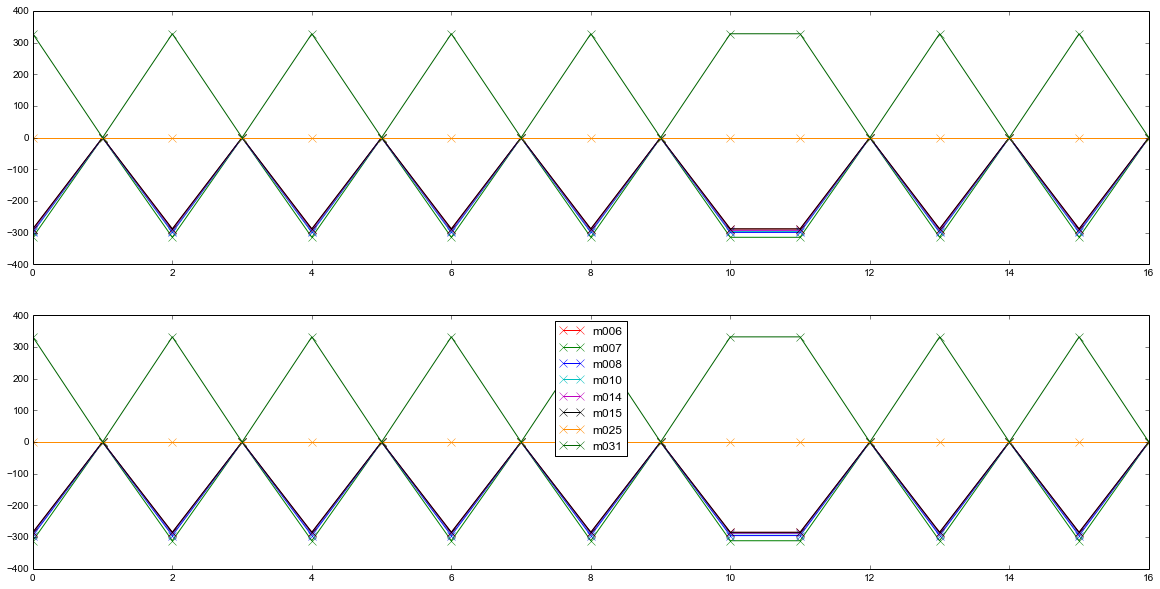

In [13]:
#plot delays (if there are many delays)
fig, ax = plt.subplots(2,1,figsize=(20, 10))
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')

# Gains

In [14]:
g = h.file['TelescopeState']['cal_product_G']
g_list = []
for i, gi in enumerate(g):
    g_list.append(pickle.loads(gi[1]))
g_array = np.array(g_list)
print g_array.shape

g_0 = g_array[:,0,:]
g_1 = g_array[:,1,:]

(32, 2, 8)


In [15]:
#First
print np.abs(g_0)[0]
print np.abs(g_1)[0]

[ 0.9992  0.9988  0.9988  0.9977  1.0039  1.001   1.0012  1.0006]
[ 1.0008  0.9988  1.0012  1.0007  0.9978  1.0014  0.9992  1.0011]


In [16]:
#Last
print np.abs(g_0)[-1]
print np.abs(g_1)[-1]

[ 0.9967  1.0028  0.9983  1.0045  1.0034  1.0012  1.0018  1.0026]
[ 1.0025  1.0005  1.0009  1.0036  1.0019  1.0004  0.9985  1.0003]


In [17]:
#Ratio
print np.abs(g_0)[-1]/np.abs(g_0)[0]
print np.abs(g_1)[-1]/np.abs(g_1)[0]

[ 0.9974  1.004   0.9994  1.0069  0.9995  1.0002  1.0006  1.002 ]
[ 1.0017  1.0017  0.9997  1.0029  1.0041  0.999   0.9993  0.9992]


In [18]:
#Before
print np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[0])

[ 115.0916  101.0942  135.9494  101.3964  -28.9063  123.7688    0.
   27.8946]
[  78.8691  118.9876  119.0926   98.5681  104.3389   92.4305   -0.
   77.9584]


In [19]:
#After
print np.rad2deg(np.angle(g_0)[-1])
print np.rad2deg(np.angle(g_1)[-1])

[  60.3515   87.3935  138.0389  104.743   138.1935   92.9503    0.
   10.6038]
[  16.716    94.6824  118.6941  104.1014   86.8901   52.1016    0.
   44.8449]


In [20]:
#Differences
print np.rad2deg(np.angle(g_0)[-1])-np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[-1])-np.rad2deg(np.angle(g_1)[0])

[ -54.7401  -13.7007    2.0894    3.3466  167.0998  -30.8185   -0.
  -17.2907]
[-62.1531 -24.3051  -0.3985   5.5332 -17.4488 -40.3288   0.     -33.1135]


/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


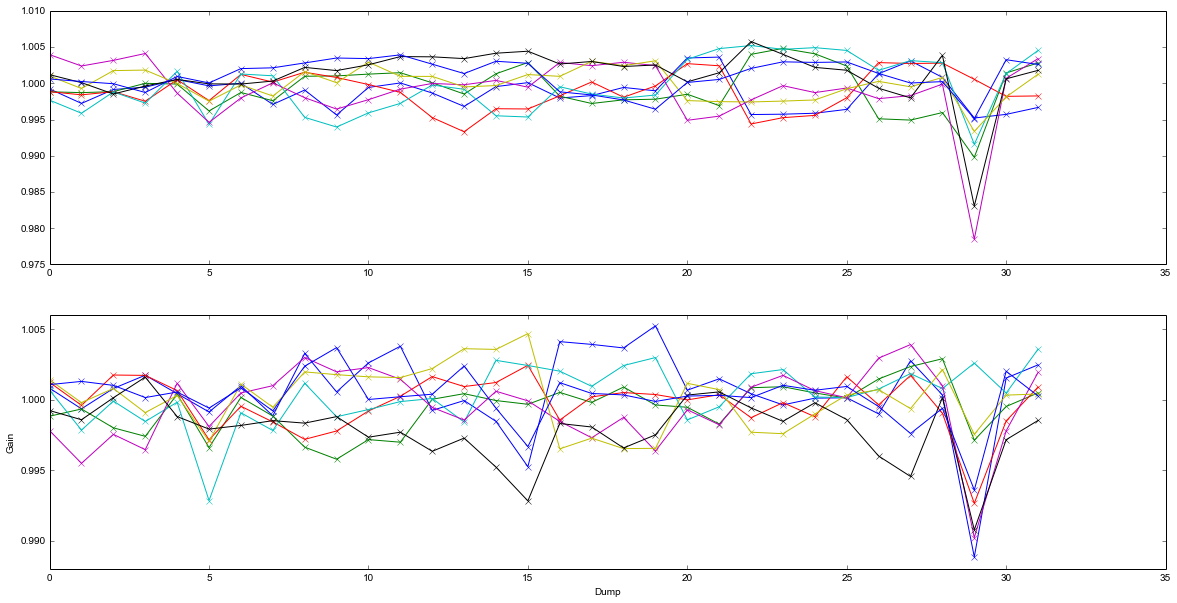

In [21]:
#plot gains - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(g_0),'-x');
#ax[0].set_ylim([0,5.0]);
ax[1].plot(np.abs(g_1),'-x');
#ax[1].set_ylim([0,5.0]);
plt.xlabel('Dump')
plt.ylabel('Gain')
plt.legend()

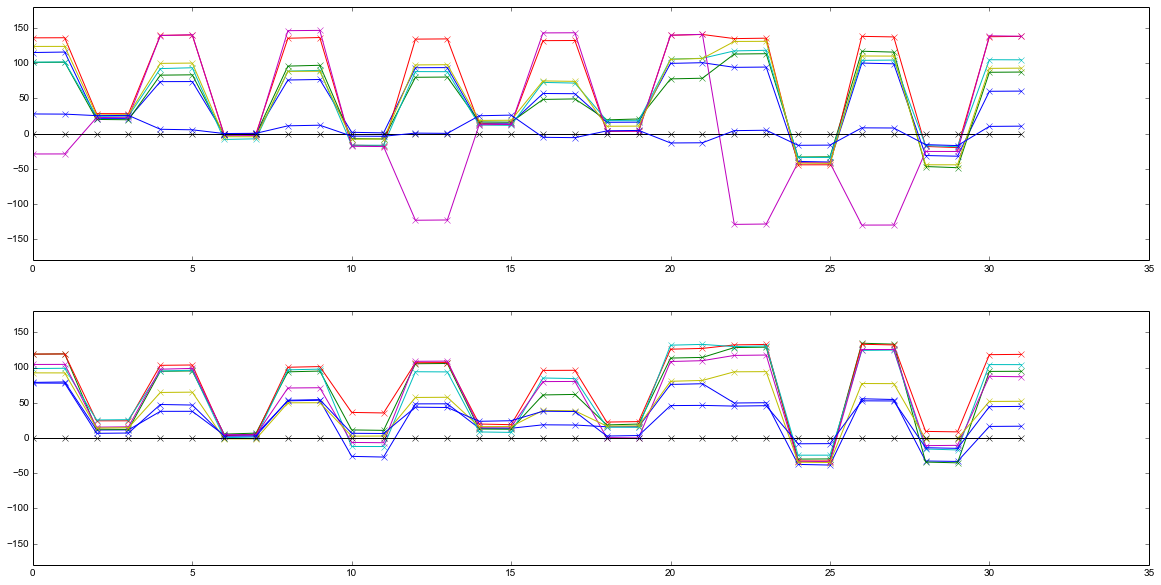

In [22]:
#plot gains - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(g_0)),'-x');
ax[0].set_ylim([-180,180]);
ax[1].plot(np.rad2deg(np.angle(g_1)),'-x');
ax[1].set_ylim([-180,180]);

# Bandpasses    

In [23]:
b = h.file['TelescopeState']['cal_product_B']
b_list = []
for i, bi in enumerate(b):
    b_list.append(pickle.loads(bi[-1]))
b_array = np.array(b_list)
print b_array.shape
# bandpass shape is ntimes x channels x pol x antenna 
# where ntimes is the number of bandpasses

# just look at LAST bandpass for now
b_0_0 = b_array[-1,:,0,:]
b_1_0 = b_array[-1,:,1,:]



(16, 4096, 2, 8)


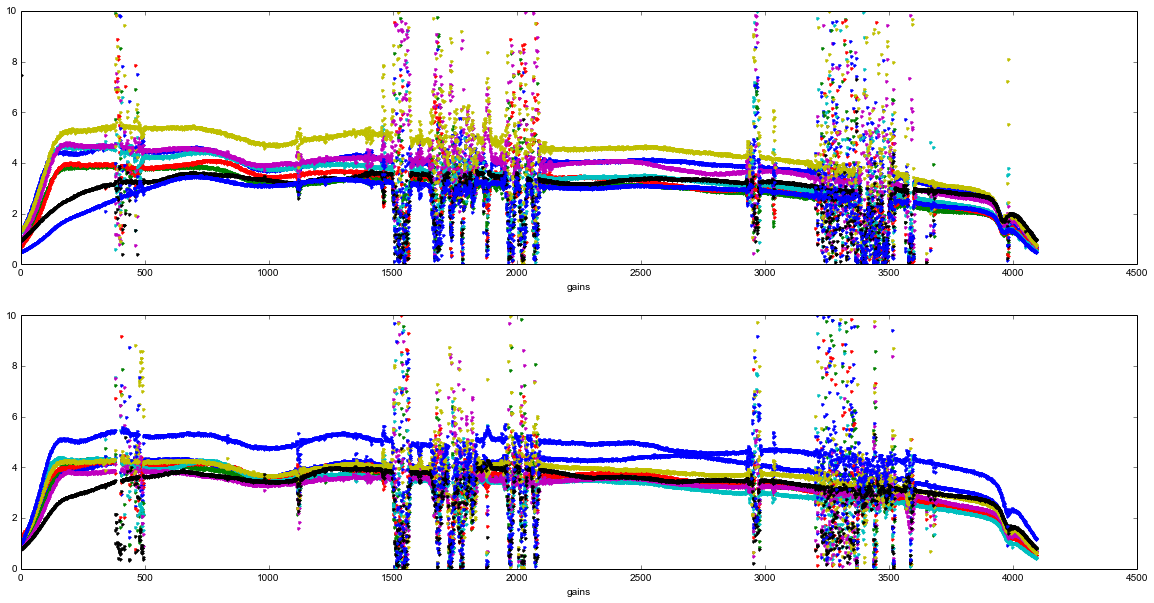

In [24]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_0),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_0),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

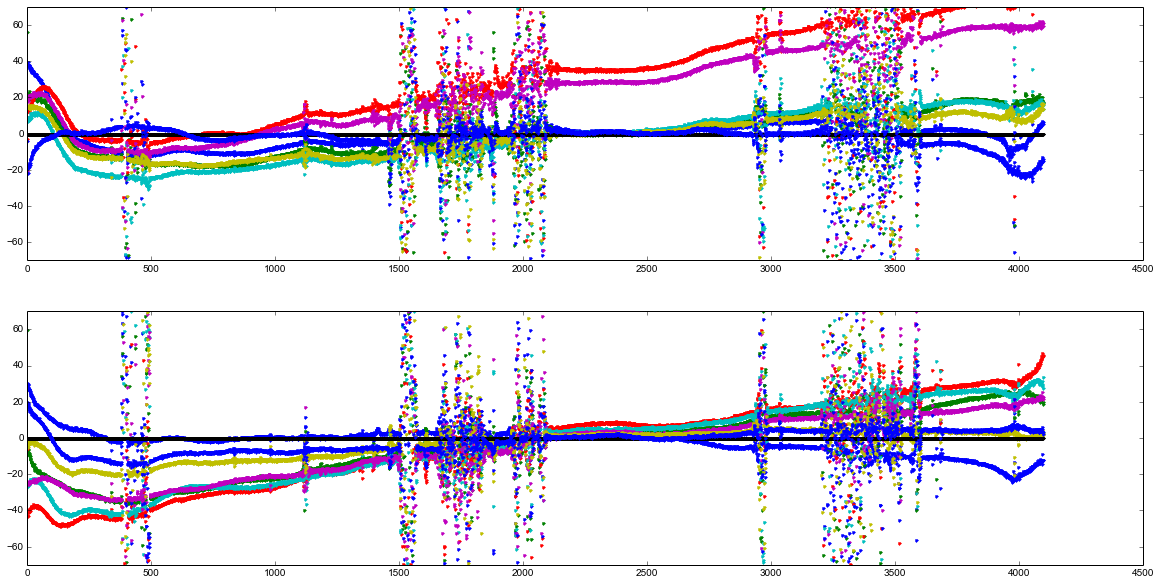

In [25]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].set_ylim([-70,70]);
ax[1].set_ylim([-70,70]);
ax[0].plot(np.rad2deg(np.angle(b_0_0)),'.');
ax[1].plot(np.rad2deg(np.angle(b_1_0)),'.');

In [26]:
b_array.shape
# Time,channels,pols,antennas

(16, 4096, 2, 8)

In [27]:
#One bandpass at the END
antn=7
b_0_1 = b_array[-1,:,0,antn]
b_1_1 = b_array[-1,:,1,antn]
print b_1_1.shape
print a_array[:,antn]

(4096,)
['m031']


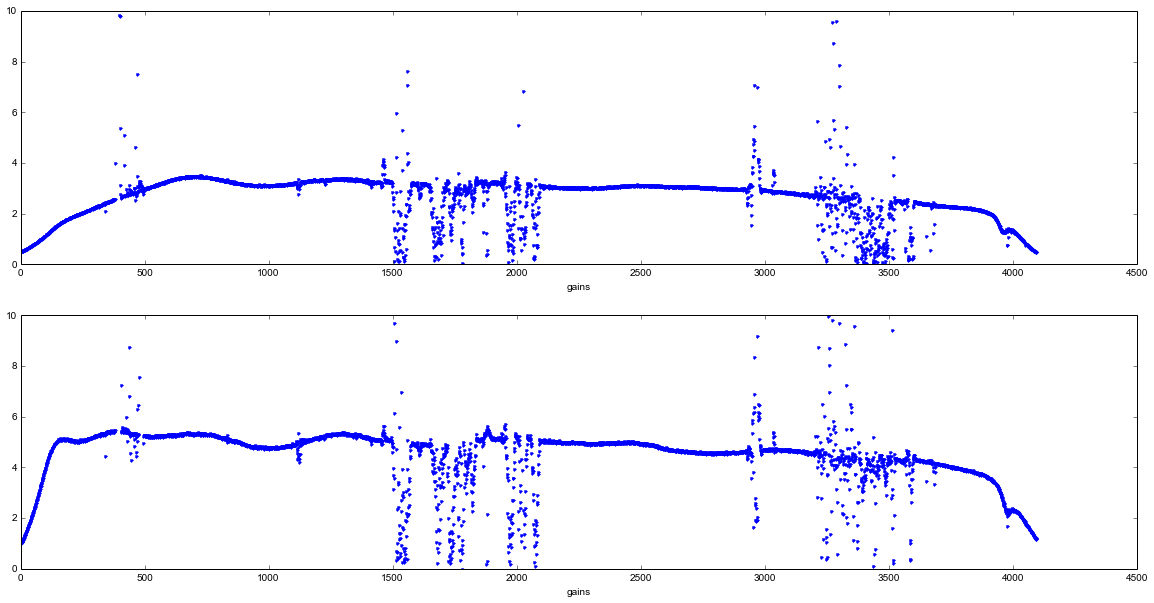

In [28]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_1),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_1),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

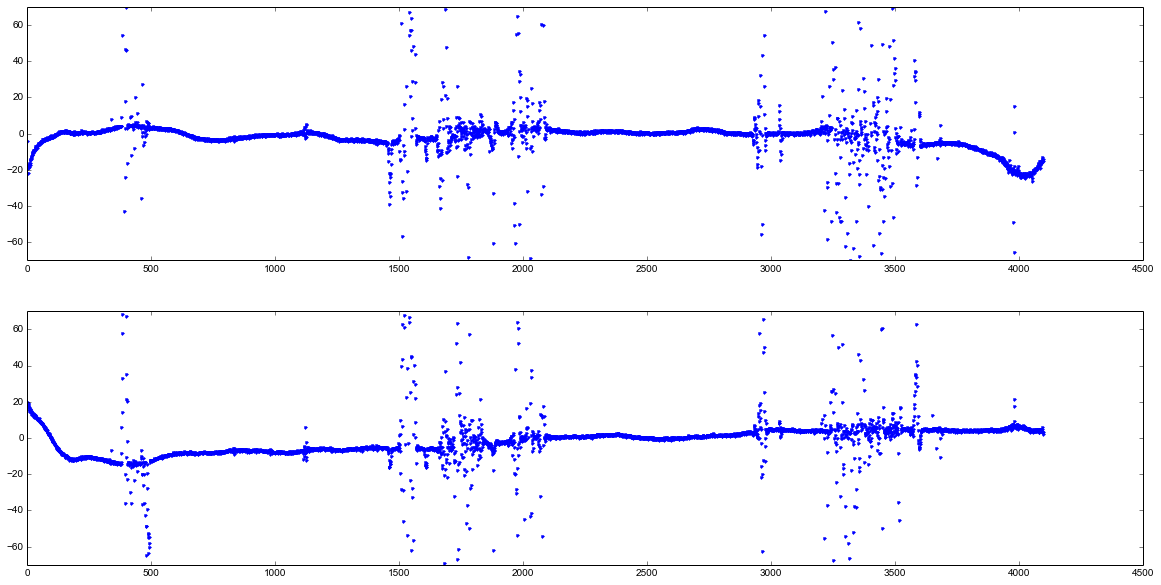

In [29]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_1)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_1)),'.');
ax[1].set_ylim([-70,70]);

In [30]:
str(h.catalogue.targets[1])

'3C286 (J1331+3030), tags=radec bfcal single_accumulation, 13:31:08.29 30:30:33.0, flux defined for 800 - 43200 MHz'